My implementation of graphSLAM

In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("movement.csv")
df.columns
start = 13.424000000 # Find the start timestamp and call that "zero"
df["Timestamps"] = df["Seconds"] + (df["Nanoseconds"] * pow(10, -9)) - start

In [3]:
df.head()


,MessageType,Seconds,Nanoseconds,r,theta,color,Latitude,Longitude,Orientation.x,Orientation.y,...,Orientation.w,LinearAccel.x,LinearAccel.y,LinearAccel.z,Steering,LeftFrontSpeed,LeftBackSpeed,RightFrontSpeed,RightBackSpeed,Timestamps
0,Imu,13,424000000,NaN,NaN,NaN,NaN,NaN,-4.861444e-08,2.884101e-07,...,1.0,-0.069879,-0.013457,9.932187,NaN,NaN,NaN,NaN,NaN,0.000
1,Imu,13,425000000,NaN,NaN,NaN,NaN,NaN,-4.861442e-08,2.884102e-07,...,1.0,-0.039597,0.019242,9.863364,NaN,NaN,NaN,NaN,NaN,0.001
2,Imu,13,426000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,...,1.0,0.065065,0.005140,9.975646,NaN,NaN,NaN,NaN,NaN,0.002
3,WheelSpeeds,13,426000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,999.136963,0.220551,997.809326,-0.317707,0.002
4,Imu,13,427000000,NaN,NaN,NaN,NaN,NaN,-4.861441e-08,2.884101e-07,...,1.0,-0.068884,0.082392,9.652662,NaN,NaN,NaN,NaN,NaN,0.003


In [4]:
df["MessageType"].unique()
#'Imu', 'WheelSpeeds', 'Cones', 'GPS'

array(['Imu', 'WheelSpeeds', 'Cones', 'GPS'], dtype=object)

Separate data into various sets for plotting

In [5]:
imuSet = df.loc[df["MessageType"] == 'Imu']
wheelSpeedsSet = df.loc[df["MessageType"] == 'WheelSpeeds']
conesSet = df.loc[df["MessageType"] == 'Cones']
gpsSet = df.loc[df["MessageType"] == 'GPS']

In [6]:
wheelSpeedsSet["LeftFrontSpeed"].describe()

count    6291.000000
mean      998.995372
std         0.998021
min       995.171204
25%       998.327606
50%       999.005493
75%       999.660767
max      1002.633728
Name: LeftFrontSpeed, dtype: float64

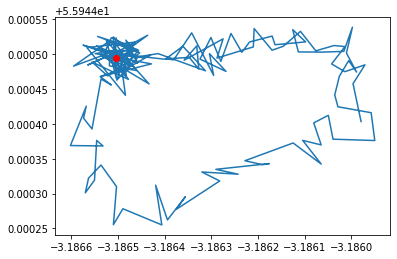

In [7]:
#GPS
plt.plot(gpsSet["Longitude"], gpsSet["Latitude"])
indexGPS = 0
plt.plot(list(gpsSet["Longitude"])[indexGPS], list(gpsSet["Latitude"])[indexGPS], 'ro')

Analyzing WheelSpeeds:

In [8]:
#Calculate positions off of wheel speeds
wheelTimeStamps = list(wheelSpeedsSet["Timestamps"])
backLeftWheelSpeeds = list(wheelSpeedsSet["LeftBackSpeed"])
backRightWheelSpeeds = list(wheelSpeedsSet["RightBackSpeed"])

In [9]:
def convertRPMtoMPS(RPMinput):
    meters_per_minute = RPMinput * math.pi * 0.505
    meters_per_second = meters_per_minute / 60
    return meters_per_second

backLeftWheelSpeeds = list(map(convertRPMtoMPS, backLeftWheelSpeeds))
backRightWheelSpeeds = list(map(convertRPMtoMPS, backRightWheelSpeeds))

In [ ]:
backRightWheelSpeeds

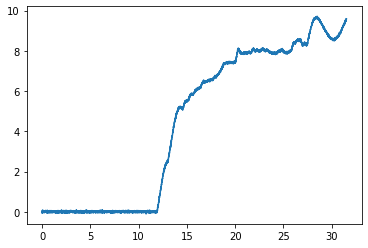

In [11]:
plt.plot(wheelTimeStamps, backLeftWheelSpeeds)

Found this online, simple conversion from quaternions to euler angles(just yaw for now)

In [12]:

def ToEulerAngles(w, x, y, z):
    angles = []
    
    '''
    # roll (x-axis rotation)
    sinr_cosp = 2 * (w * x + y * z)
    cosr_cosp = 1 - 2 * (x * x + y * y)
    roll = math.atan2(sinr_cosp, cosr_cosp)
    
    # pitch (y-axis rotation)
    sinp = math.sqrt(1 + 2 * (w * y - x * z))
    cosp = math.sqrt(1 - 2 * (w * y - x * z))
    pitch = math.atan2(sinp, cosp) - (math.pi / 2)
    '''
    # yaw (z-axis rotation)
    siny_cosp = 2 * (w * z + x * y)
    cosy_cosp = 1 - 2 * (y * y + z * z)
    yaw = math.atan2(siny_cosp, cosy_cosp)

    return yaw * 180 / math.pi

This dataset is just for approaches 1-2(not the final approach)

In [13]:
imu_and_wheelspeeds = df.loc[df["MessageType"].isin(["WheelSpeeds", "Imu"])]

In [14]:
imu_and_wheelspeeds

,MessageType,Seconds,Nanoseconds,r,theta,color,Latitude,Longitude,Orientation.x,Orientation.y,...,Orientation.w,LinearAccel.x,LinearAccel.y,LinearAccel.z,Steering,LeftFrontSpeed,LeftBackSpeed,RightFrontSpeed,RightBackSpeed,Timestamps
0,Imu,13,424000000,NaN,NaN,NaN,NaN,NaN,-4.861444e-08,2.884101e-07,...,1.000000,-0.069879,-0.013457,9.932187,NaN,NaN,NaN,NaN,NaN,0.000
1,Imu,13,425000000,NaN,NaN,NaN,NaN,NaN,-4.861442e-08,2.884102e-07,...,1.000000,-0.039597,0.019242,9.863364,NaN,NaN,NaN,NaN,NaN,0.001
2,Imu,13,426000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,...,1.000000,0.065065,0.005140,9.975646,NaN,NaN,NaN,NaN,NaN,0.002
3,WheelSpeeds,13,426000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,999.136963,0.220551,997.809326,-0.317707,0.002
4,Imu,13,427000000,NaN,NaN,NaN,NaN,NaN,-4.861441e-08,2.884101e-07,...,1.000000,-0.068884,0.082392,9.652662,NaN,NaN,NaN,NaN,NaN,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42355,Imu,44,953000000,NaN,NaN,NaN,NaN,NaN,-6.785315e-07,4.741825e-07,...,-0.605027,-0.037107,-11.154437,9.696209,NaN,NaN,NaN,NaN,NaN,31.529
42356,Imu,44,954000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,...,-0.604411,-0.960968,-10.544933,10.048240,NaN,NaN,NaN,NaN,NaN,31.530
42357,Imu,44,955000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,...,-0.603991,-0.242611,-11.215021,9.679478,NaN,NaN,NaN,NaN,NaN,31.531
42358,Imu,44,956000000,NaN,NaN,NaN,NaN,NaN,-5.987453e-07,4.952731e-07,...,-0.603773,-1.231684,-10.596595,9.941318,NaN,NaN,NaN,NaN,NaN,31.532


Running the euler angle conversions

In [15]:
yaws = []
timestamp_for_yaws = []
for i in range(0, len(imu_and_wheelspeeds)):
    angle = ToEulerAngles(imu_and_wheelspeeds["Orientation.w"].iloc[i], imu_and_wheelspeeds["Orientation.x"].iloc[i], imu_and_wheelspeeds["Orientation.y"].iloc[i], imu_and_wheelspeeds["Orientation.z"].iloc[i])
    if (abs(angle) < 0.0001):
        angle = 0
    yaws.append(angle)
    timestamp_for_yaws.append(imu_and_wheelspeeds["Timestamps"].iloc[i])
imu_and_wheelspeeds.insert(2, "Yaws", yaws)

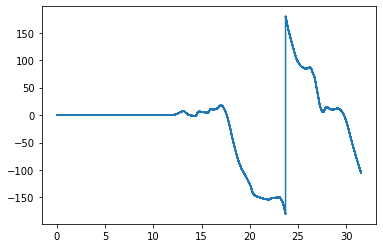

In [16]:
plt.plot(timestamp_for_yaws, yaws)

In [17]:
imu_and_wheelspeeds.columns

Index(['MessageType', 'Seconds', 'Yaws', 'Nanoseconds', 'r', 'theta', 'color',
       'Latitude', 'Longitude', 'Orientation.x', 'Orientation.y',
       'Orientation.z', 'Orientation.w', 'LinearAccel.x', 'LinearAccel.y',
       'LinearAccel.z', 'Steering', 'LeftFrontSpeed', 'LeftBackSpeed',
       'RightFrontSpeed', 'RightBackSpeed', 'Timestamps'],
      dtype='object')

In [18]:
imu_and_wheelspeeds

,MessageType,Seconds,Yaws,Nanoseconds,r,theta,color,Latitude,Longitude,Orientation.x,...,Orientation.w,LinearAccel.x,LinearAccel.y,LinearAccel.z,Steering,LeftFrontSpeed,LeftBackSpeed,RightFrontSpeed,RightBackSpeed,Timestamps
0,Imu,13,0.000000,424000000,NaN,NaN,NaN,NaN,NaN,-4.861444e-08,...,1.000000,-0.069879,-0.013457,9.932187,NaN,NaN,NaN,NaN,NaN,0.000
1,Imu,13,0.000000,425000000,NaN,NaN,NaN,NaN,NaN,-4.861442e-08,...,1.000000,-0.039597,0.019242,9.863364,NaN,NaN,NaN,NaN,NaN,0.001
2,Imu,13,0.000000,426000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,1.000000,0.065065,0.005140,9.975646,NaN,NaN,NaN,NaN,NaN,0.002
3,WheelSpeeds,13,NaN,426000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.000000,999.136963,0.220551,997.809326,-0.317707,0.002
4,Imu,13,0.000000,427000000,NaN,NaN,NaN,NaN,NaN,-4.861441e-08,...,1.000000,-0.068884,0.082392,9.652662,NaN,NaN,NaN,NaN,NaN,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42355,Imu,44,-105.538424,953000000,NaN,NaN,NaN,NaN,NaN,-6.785315e-07,...,-0.605027,-0.037107,-11.154437,9.696209,NaN,NaN,NaN,NaN,NaN,31.529
42356,Imu,44,-105.627112,954000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,-0.604411,-0.960968,-10.544933,10.048240,NaN,NaN,NaN,NaN,NaN,31.530
42357,Imu,44,-105.687392,955000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,-0.603991,-0.242611,-11.215021,9.679478,NaN,NaN,NaN,NaN,NaN,31.531
42358,Imu,44,-105.718810,956000000,NaN,NaN,NaN,NaN,NaN,-5.987453e-07,...,-0.603773,-1.231684,-10.596595,9.941318,NaN,NaN,NaN,NaN,NaN,31.532


In [ ]:
# Approach: Calculate odometry purely off of encoders
dBaseline = 1 # meters
xArray, yArray, thetaArray = [0], [0], [0]
currX, currY, currTheta = 0, 0, 0
lastLeftSpeed, lastRightSpeed = 0, 0
lastTimeStamp = 0
lastImu = [0, 0] # time, yaw
for i in range(0, len(imu_and_wheelspeeds)):
    '''
    if imu_and_wheelspeeds["MessageType"].iloc[i] == "Imu":
        lastImu = [imu_and_wheelspeeds["Timestamps"].iloc[i], imu_and_wheelspeeds["Yaws"].iloc[i]]
    '''
    if imu_and_wheelspeeds["MessageType"].iloc[i] == "WheelSpeeds":
        rightSpeed = convertRPMtoMPS(imu_and_wheelspeeds["RightBackSpeed"].iloc[i])
        leftSpeed = convertRPMtoMPS(imu_and_wheelspeeds["LeftBackSpeed"].iloc[i])
        currTimeStamp = imu_and_wheelspeeds["Timestamps"].iloc[i]
        
        dRight = ((rightSpeed + lastRightSpeed) / 2) * (currTimeStamp - lastTimeStamp)
        dLeft = ((leftSpeed + lastLeftSpeed) / 2) * (currTimeStamp - lastTimeStamp)
        dCenter = (dLeft + dRight) / 2
        phi = (dRight - dLeft) / dBaseline

        currTheta += phi

        currX += dCenter * math.cos(currTheta)
        currY += dCenter * math.sin(currTheta)
        print(currX, currY, currTheta)
        xArray.append(currX)
        yArray.append(currY)
        thetaArray.append(currTheta)
        lastLeftSpeed = leftSpeed
        lastRightSpeed = rightSpeed
        lastTimeStamp = currTimeStamp
        
        

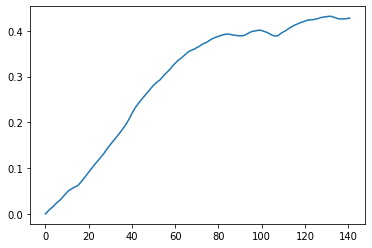

In [20]:
plt.plot(xArray, yArray)

In [ ]:
#Approach 2: Calculate x,y given encoders and IMU data
dBaseline = 1 # meters
xArray, yArray, thetaArray = [0], [0], [0]
currX, currY, currTheta = 0, 0, 90
lastLeftSpeed, lastRightSpeed = 0, 0
lastTimeStamp = 0
lastImu = [0, 0] # time, yaw
for i in range(0, len(imu_and_wheelspeeds)):
    
    if imu_and_wheelspeeds["MessageType"].iloc[i] == "Imu":
        lastImu = [imu_and_wheelspeeds["Timestamps"].iloc[i], imu_and_wheelspeeds["Yaws"].iloc[i]]
    else:
        rightSpeed = convertRPMtoMPS(imu_and_wheelspeeds["RightBackSpeed"].iloc[i])
        leftSpeed = convertRPMtoMPS(imu_and_wheelspeeds["LeftBackSpeed"].iloc[i])
        currTimeStamp = imu_and_wheelspeeds["Timestamps"].iloc[i]
        
        dRight = ((rightSpeed + lastRightSpeed) / 2) * (currTimeStamp - lastTimeStamp)
        dLeft = ((leftSpeed + lastLeftSpeed) / 2) * (currTimeStamp - lastTimeStamp)
        dCenter = (dLeft + dRight) / 2
        phi = (dRight - dLeft) / dBaseline

        currTheta += phi

        imuYaw = lastImu[1]
        alpha = 0.2  # Weighting factor to trust IMU or encoder more
        #thetaToUse = alpha * (currTheta) + (1 - alpha) * imuYaw
        thetaToUse = imuYaw * math.pi / 180

        currX += dCenter * math.cos(thetaToUse)
        currY += dCenter * math.sin(thetaToUse)
        print(currX, currY, currTheta)
        xArray.append(currX)
        yArray.append(currY)
        thetaArray.append(currTheta)
        lastLeftSpeed = leftSpeed
        lastRightSpeed = rightSpeed
        lastTimeStamp = currTimeStamp
        
        

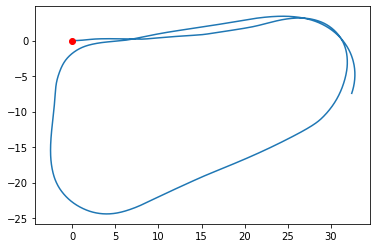

In [22]:
plt.plot(xArray, yArray)
i = 0
plt.plot(xArray[i], yArray[i], 'ro')
#for i in range(0, len(xArray)):
    # plt.plot(xArray[i], yArray[i], 'ro')

In [23]:
imu_wheels_cones = df.loc[df["MessageType"].isin(["WheelSpeeds", "Imu", "Cones"])]
yaws = []
timestamp_for_yaws = []
for i in range(0, len(imu_wheels_cones)):
    angle = ToEulerAngles(imu_wheels_cones["Orientation.w"].iloc[i], imu_wheels_cones["Orientation.x"].iloc[i], imu_wheels_cones["Orientation.y"].iloc[i], imu_wheels_cones["Orientation.z"].iloc[i])
    if (abs(angle) < 0.0001):
        angle = 0
    yaws.append(angle)
    timestamp_for_yaws.append(imu_wheels_cones["Timestamps"].iloc[i])
imu_wheels_cones.insert(2, "Yaws", yaws)

In [ ]:
conesSet

Final Approach: GraphSLAM on IMU + Wheelspeeds + Cones

the following code processes the dataset such that it is in the format for SLAM

In [25]:
def checkInCircle(ogX, ogY, newX, newY, radiusBound):
    dist = math.sqrt(pow(abs(newX - ogX), 2) + pow(abs(ogY - newY), 2))
    return dist < radiusBound

In [ ]:
#Approach 3: Calculate x,y given encoders and IMU data
dBaseline = 1 # meters
xArray, yArray, thetaArray = [0], [0], [0] # list of robot poses
currX, currY, currTheta = 0, 0, 90 # current robot pose
blueConesX, blueConesY = [], [] # ignore for this implementation
yellowConesX, yellowConesY = [], [] # ignore for this implementation
conesX, conesY = [], [] # General cone data set
lastLeftSpeed, lastRightSpeed = 0, 0 # 
lastTimeStamp = 0
lastImu = [0, 0] # time, yaw
maxconeID = 0 # Latest cone id to +1 when we see a new cone
data = [[0, 0, 90, []]] # dataset to feed into the SLAM algorithm
conesSet = [] # append with [id, posX, posY]

for i in range(0, len(imu_wheels_cones)):
    
    if imu_wheels_cones["MessageType"].iloc[i] == "Imu": # Add IMU Data
        lastImu = [imu_wheels_cones["Timestamps"].iloc[i], imu_wheels_cones["Yaws"].iloc[i]]
    elif imu_wheels_cones["MessageType"].iloc[i] == "Cones": # Add cones data
        mag = imu_wheels_cones["r"].iloc[i]
        thetaCone = imu_wheels_cones["theta"].iloc[i]
        coneColor = imu_wheels_cones["color"].iloc[i]
        carTheta = lastImu[1] * math.pi / 180

        
        currentConeX = currX + (mag * math.cos(carTheta + thetaCone))
        currentConeY = currY + (mag * math.sin(carTheta + thetaCone))

        

        newCones = True
        coneIDFound = -1

        for i in range(0, len(conesSet)):
            if checkInCircle(conesSet[i][1], conesSet[i][2], currentConeX, currentConeY, 2.0):
                coneIDFound = conesSet[i][0]
                newCones = False
        
        #TODO: decide whether to avg cone x,y, and id each cone

        if (newCones):
            conesX.append(currX + (mag * math.cos(carTheta + thetaCone)))
            conesY.append(currY + (mag * math.sin(carTheta + thetaCone)))
            data[-1][-1].append([maxconeID, (mag * math.cos(carTheta + thetaCone)), (mag * math.sin(carTheta + thetaCone))])
            conesSet.append([maxconeID, currentConeX, currentConeY])
            maxconeID += 1
            if coneColor == 2:
                blueConesX.append(currentConeX)
                blueConesY.append(currentConeY)
            else:
                yellowConesX.append(currentConeX)
                yellowConesY.append(currentConeY)
        else:
            putValIn = True
            for i in range(len(data[-1][-1])):
                if data[-1][-1][i][0] == coneIDFound:
                    putValIn = False
            if putValIn:
                data[-1][-1].append([coneIDFound,(mag * math.cos(carTheta + thetaCone)), (mag * math.sin(carTheta + thetaCone))])

        
    else:
        rightSpeed = convertRPMtoMPS(imu_wheels_cones["RightBackSpeed"].iloc[i])
        leftSpeed = convertRPMtoMPS(imu_wheels_cones["LeftBackSpeed"].iloc[i])
        currTimeStamp = imu_wheels_cones["Timestamps"].iloc[i]
        
        dRight = ((rightSpeed + lastRightSpeed) / 2) * (currTimeStamp - lastTimeStamp)
        dLeft = ((leftSpeed + lastLeftSpeed) / 2) * (currTimeStamp - lastTimeStamp)
        dCenter = (dLeft + dRight) / 2
        phi = (dRight - dLeft) / dBaseline

        currTheta += phi

        imuYaw = lastImu[1]
        alpha = 0.2  # Weighting factor to trust IMU or encoder more
        #thetaToUse = alpha * (currTheta) + (1 - alpha) * imuYaw
        thetaToUse = imuYaw * math.pi / 180

        currX += dCenter * math.cos(thetaToUse)
        currY += dCenter * math.sin(thetaToUse)
        print(currX, currY, currTheta)
        xArray.append(currX)
        yArray.append(currY)
        data.append([currX, currY, currTheta, []])
        thetaArray.append(currTheta)
        lastLeftSpeed = leftSpeed
        lastRightSpeed = rightSpeed
        lastTimeStamp = currTimeStamp
        
        

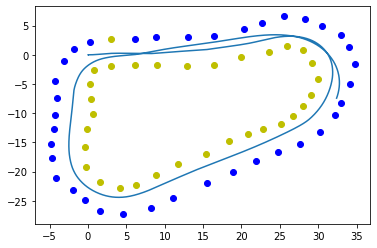

In [74]:
plt.plot(blueConesX, blueConesY, 'bo')
plt.plot(yellowConesX, yellowConesY, 'yo')
plt.plot(xArray, yArray)

In [ ]:
conesSet


In [100]:
numLandmarks = len(conesSet)
numPositions = len(xArray)
startX = 0
startY = 0
rows, cols = 2 * (numPositions + numLandmarks), 2 * (numPositions + numLandmarks)
omega = np.zeros((rows, cols))
pVector = np.zeros((rows, 1))
pVector[0] = startX
pVector[1] = startY
omega[0, 0] = 1
omega[1, 1] = 1

In [ ]:
data

In [ ]:
for i in range(0, len(data)):
    landmarkArray = data[i][-1]

    for j in range(0, len(landmarkArray)):
        print(landmarkArray)
        markID = landmarkArray[j][0]
        x = landmarkArray[j][1]
        y = landmarkArray[j][2]
        
        nweight = 1
        #X indexes
        omega[2*i, 2*i] += nweight
        omega[2*i, 2*numPositions + 2*markID] += -nweight
        omega[2*numPositions + 2*markID, 2*i] += -nweight
        omega[2*numPositions + 2*markID, 2*numPositions + 2*markID] += nweight 

        pVector[2*i, 0] += -x *nweight
        pVector[2*numPositions + 2*markID, 0] += x *nweight
        # y indexes
        omega[2*i + 1, 2*i + 1] += nweight
        omega[2*i + 1, 2*numPositions + 2*markID + 1] += -nweight
        omega[2*numPositions + 2*markID + 1, 2*i + 1] += -nweight
        omega[2*numPositions + 2*markID + 1, 2*numPositions + 2*markID + 1] += nweight
        pVector[2*i + 1, 0] += -y *nweight
        pVector[2*numPositions + 2*markID + 1, 0] += y *nweight  
    
    if i == 0: # skip adding to the matrix if we on first position
        continue

    dx = data[i][0] - data[i-1][0]  
    dy = data[i][1] - data[i-1][1]


    mweight = 1.0

    index = (i-1)
    # X indexes
    omega[2*index, 2*index] +=  mweight
    omega[2*index, 2*index + 2] += - mweight
    omega[2*index + 2, 2*index] += - mweight
    omega[2*index + 2, 2*index + 2] += mweight

    pVector[2*index, 0] += -dx  * mweight             
    pVector[2*index + 2, 0] += dx * mweight   

    # Y indexes
    omega[2*index + 1, 2*index + 1] += mweight
    omega[2*index + 1, 2*index + 3] += - mweight
    omega[2*index + 3, 2*index + 1] += - mweight
    omega[2*index + 3, 2*index + 3] += mweight 

    pVector[2*index + 1, 0] += -dy * mweight
    pVector[2*index + 3, 0] += dy * mweight



In [103]:
mu = np.linalg.inv(np.matrix(omega)) * pVector

In [104]:
def get_poses_landmarks(mu, N):
    # create a list of poses
    poses = []
    for i in range(N):
        poses.append((mu[2*i].item(), mu[2*i+1].item()))

    # create a list of landmarks
    landmarks = []
    for i in range(numLandmarks):
        landmarks.append((mu[2*(N+i)].item(), mu[2*(N+i)+1].item()))

    # return completed lists
    return poses, landmarks
poses, landmarks = get_poses_landmarks(mu, numPositions)

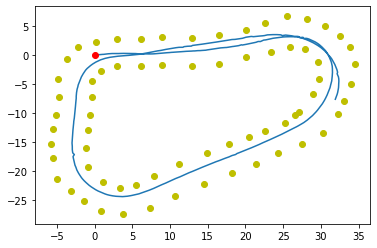

In [108]:
xPoses = []
yPoses = []
xLandmarks = []
yLandmarks = []
for i in range(0, len(poses)):
    xPoses.append(poses[i][0])
    yPoses.append(poses[i][1])
for i in range(0, len(landmarks)):
    xLandmarks.append(landmarks[i][0])
    yLandmarks.append(landmarks[i][1])
plt.plot(xPoses, yPoses)
k = 2
plt.plot(xPoses[k], yPoses[k], 'ro')
plt.plot(xLandmarks, yLandmarks, 'yo')

In [93]:
len(xArray)

6292